In [85]:
##FUNCTIONS IN THIS NOTEBOOK ARE AN ADAPTATION OF COURSERA TENSORFLOW PROGRAMMING ASSIGNMENT
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import json 
%matplotlib inline

In [104]:
#train_labels
with open(r"C:\Users\kathe\Documents\CS230\project\caption\medium-show-and-tell-caption-generator\dev_enc2.json") as json_data:
    d = json.load(json_data)
arr=np.array(d).T

with open(r"C:\Users\kathe\Documents\CS230\project\proj\labels.json") as json_data:
    d = json.load(json_data)
train_labels=(np.array(d['trainY']))
labels = train_labels

#test labels
with open(r"C:\Users\kathe\Documents\CS230\project\caption\medium-show-and-tell-caption-generator\test_enc1.json") as json_data:
    d = json.load(json_data)
test_X=np.array(d).T

with open(r"C:\Users\kathe\Documents\CS230\project\proj\labels.json") as json_data:
    d = json.load(json_data)
test_labels=(np.array(d['testY']))


[2 7 3 ... 0 5 5]
(8493,)


In [88]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
        
    C = tf.constant(C, name='C')  
    one_hot_matrix = tf.one_hot(labels,C,axis=0)  
    sess  = tf.Session()  
    one_hot = sess.run(one_hot_matrix)   
    sess.close()      
    return one_hot

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [91]:
def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
        
    z = tf.placeholder(tf.float32, name = "z")
    y = tf.placeholder(tf.float32, name = "y")
    cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits = z,  labels = y)
    sess  = tf.Session()
    result = sess.run(cost , feed_dict = {z:logits, y:labels})
    cost = result
    sess.close() 
        
    return cost

In [92]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    x = tf.placeholder(tf.float32, name = "x")

    sigmoid = tf.sigmoid(x)
    with tf.Session() as sess:
        result = sess.run(sigmoid, feed_dict={x:z})
    
    
    return result

In [93]:
def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    ones = tf.ones(shape)
    sess = tf.Session()
    ones = sess.run(ones)
    sess.close()
    
    return ones

In [108]:
print("Total Examples", num)
X_train = arr
Y_train = convert_to_one_hot(labels[0:num], 8)
X_test=test_X
Y_test=convert_to_one_hot(test_labels[0:len(test_labels)-1], 8)
classes =[b'amusement', b'anger', b'awe', b'contentment', b'disgust', b'excitement', b'fear', b'sadness'];
print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

Total Examples 8491
number of training examples = 8491
number of test examples = 8492
X_train shape: (1024, 8491)
Y_train shape: (8, 8491)
X_test shape: (1024, 8492)
Y_test shape: (8, 8492)


In [109]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    """

    X = tf.placeholder(tf.float32, shape=[n_x,None], name = "X")
    Y = tf.placeholder(tf.float32, shape=[n_y,None], name = "Y")
    
    return X, Y

In [110]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 1024]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
        
    W1 = tf.get_variable("W1", [25,1024], initializer = tf.contrib.layers.xavier_initializer)
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer)
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [8,12], initializer = tf.contrib.layers.xavier_initializer)
    b3 = tf.get_variable("b3", [8,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [111]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1,X),b1)                    
    A1 = tf.nn.relu(Z1)                                    
    Z2 = tf.add(tf.matmul(W2,A1),b2)                      
    A2 = tf.nn.relu(Z2)                                   
    Z3 = tf.add(tf.matmul(W3,A2),b3)        
    
    return Z3

In [112]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = labels))
    
    return cost

In [113]:
def random_mini_batches(X, Y, mini_batch_size, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [114]:
def model(X_train, Y_train, X_test, Y_test, learning_rate,
          num_epochs, minibatch_size, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    

    X, Y = create_placeholders(n_x, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        
        sess.run(init)
        
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        train_accuracy=accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print ("Train Accuracy:", train_accuracy)
        print ("Test Accuracy:", test_accuracy)
        
        return parameters, costs, train_accuracy, test_accuracy

Cost after epoch 0: 2.096664
Cost after epoch 100: 0.632683
Cost after epoch 200: 0.405500
Cost after epoch 300: 0.343857
Cost after epoch 400: 0.315468
Cost after epoch 500: 0.259387
Cost after epoch 600: 0.214690
Cost after epoch 700: 0.290361
Cost after epoch 800: 0.214070
Cost after epoch 900: 0.218186


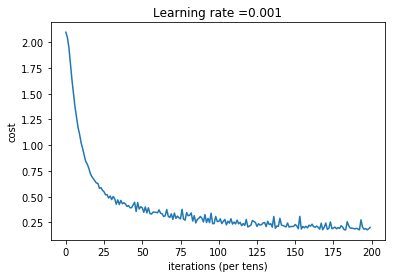

Parameters have been trained!
Train Accuracy: 0.94676715
Test Accuracy: 0.13824776


In [115]:
params, cost, train_accuracy, test_accuracy = model(X_train, Y_train, X_test, Y_test, .001, 1000, 64)

In [120]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [1024, X.shape[1]])
    
    z3 = forward_propagation(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

Correct Classification: y = 0, it's an 'amusement' picture.


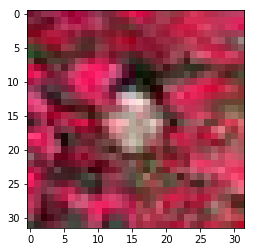

In [145]:
import matplotlib.image as mpimg

prediction = predict(X_test, params)
# print(prediction[0:10])
# print(test_labels[0:10])
#correct
# Example of a picture
index = 0
plt.figure()
path = r"D:\CS230 Project\test_img\img" +str(index)+'.jpg';
img=mpimg.imread(path)
plt.imshow(img)
print ("Correct Classification: y = 0, it's an 'amusement' picture.")

# #incorrect
# index = 4
# plt.figure()
# path = r"D:\CS230 Project\test_img\img" +str(index)+'.jpg';
# img=mpimg.imread(path)
# plt.imshow(img)
# print ("Incorrect Classification: predicted y = 4 (disgust), but is actually y = 2 (awe).")

Normalized confusion matrix


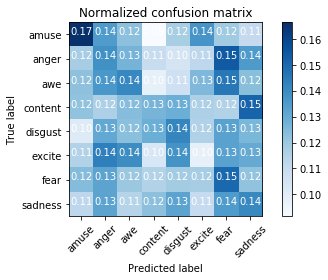

In [138]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names=['amuse','anger','awe','content','disgust','excite','fear','sadness'];

# Compute confusion matrix
y_test = test_labels[0:len(test_labels)-1]
y_pred = prediction
cnf_matrix = confusion_matrix(y_test, y_pred)
# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Predicted     0     1     2    3     4    5     6     7   All
Actual                                                       
0           176   143   130   97   124  145   126   117  1058
1           126   148   136  117   112  120   165   145  1069
2           121   135   140   97   106  124   144   122   989
3           125   119   127  130   132  119   118   155  1025
4           104   135   127  133   146  119   137   130  1031
5           120   150   146  108   144  102   139   136  1045
6           153   163   148  142   146  145   185   150  1232
7           117   138   119  128   138  115   141   147  1043
All        1042  1131  1073  952  1048  989  1155  1102  8492


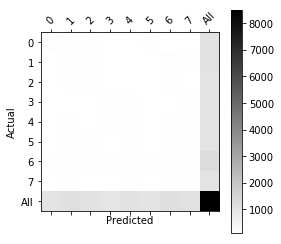

In [129]:
import pandas as pd
y_actu = pd.Series(test_labels[0:len(test_labels)-1], name='Actual')
y_pred = pd.Series(prediction, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)
df_conf_norm = df_confusion / df_confusion.sum(axis=1)

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

Cost after epoch 0: 2.091140
Cost after epoch 100: 1.509926
Cost after epoch 200: 0.993913
Cost after epoch 300: 0.636968
Cost after epoch 400: 0.399227
Cost after epoch 500: 0.253127
Cost after epoch 600: 0.168607
Cost after epoch 700: 0.121880
Cost after epoch 800: 0.096968
Cost after epoch 900: 0.081070


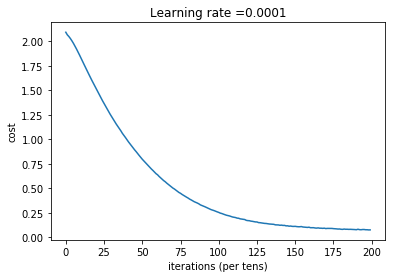

Parameters have been trained!
Train Accuracy: 0.9827381
Test Accuracy: 0.12083333
Cost after epoch 0: 2.083211
Cost after epoch 100: 0.581066
Cost after epoch 200: 0.349243
Cost after epoch 300: 0.275456
Cost after epoch 400: 0.230069
Cost after epoch 500: 0.253720
Cost after epoch 600: 0.205722
Cost after epoch 700: 0.173191
Cost after epoch 800: 0.153355
Cost after epoch 900: 0.153382


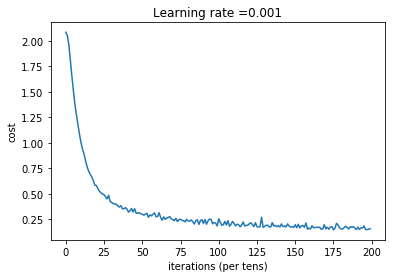

Parameters have been trained!
Train Accuracy: 0.96309525
Test Accuracy: 0.11071429
Cost after epoch 0: 2.084526
Cost after epoch 100: 2.078242
Cost after epoch 200: 2.078313
Cost after epoch 300: 2.078147
Cost after epoch 400: 2.077977
Cost after epoch 500: 2.078091
Cost after epoch 600: 2.077969
Cost after epoch 700: 2.078112
Cost after epoch 800: 2.078150
Cost after epoch 900: 2.078073


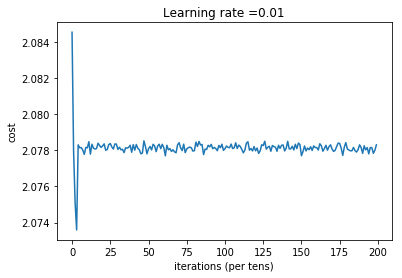

Parameters have been trained!
Train Accuracy: 0.14255953
Test Accuracy: 0.16369048
Cost after epoch 0: 2.184287
Cost after epoch 100: 2.085711
Cost after epoch 200: 2.084219
Cost after epoch 300: 2.086556
Cost after epoch 400: 2.082535
Cost after epoch 500: 2.083001
Cost after epoch 600: 2.084947
Cost after epoch 700: 2.086464
Cost after epoch 800: 2.082780
Cost after epoch 900: 2.082035


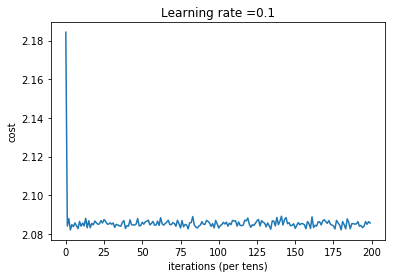

Parameters have been trained!
Train Accuracy: 0.14255953
Test Accuracy: 0.16369048
Cost after epoch 0: 192.157363
Cost after epoch 100: 2.135273
Cost after epoch 200: 2.129640
Cost after epoch 300: 2.149018
Cost after epoch 400: 2.125555
Cost after epoch 500: 2.133299
Cost after epoch 600: 2.135581
Cost after epoch 700: 2.151074
Cost after epoch 800: 2.138471
Cost after epoch 900: 2.139381


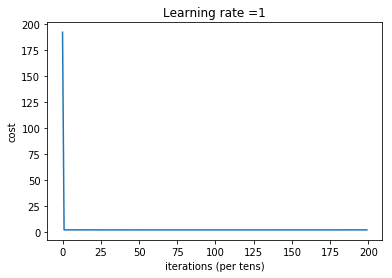

Parameters have been trained!
Train Accuracy: 0.12440476
Test Accuracy: 0.1279762


In [38]:
#Optimizing learning rate
rates = [.0001,.001,.01,.1,1]

train_accuracies=[]
test_accuracies=[]
for r in rates:
    params, cost, train_accuracy, test_accuracy = model(X_train, Y_train, X_test, Y_test, r, 1000, 64)
    if(r==rates[0]):
        costs=cost
    else:
        costs=np.vstack((costs,cost))
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


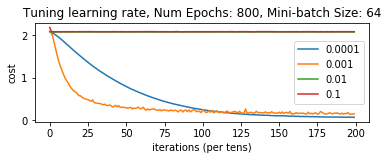

In [62]:
import matplotlib
# plot the cost
plt.subplot(2, 1, 1)
for i in range(len(rates)-1):
    plt.plot(np.squeeze(costs[i,:]))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Tuning learning rate, Num Epochs: 800, Mini-batch Size: 64")
# plt.show()
plt.legend(rates)

# plt.subplot(2, 1, 2)
# plt.plot(rates, train_accuracies, label='Train accuracies')
# plt.plot(rates, test_accuracies, label = 'Test accuracies')
# plt.legend()

Cost after epoch 0: 2.091140
Cost after epoch 100: 1.509926
Cost after epoch 200: 0.993913
Cost after epoch 300: 0.636968
Cost after epoch 400: 0.399227


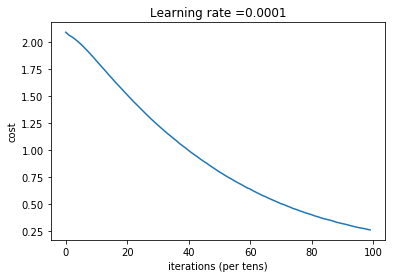

Parameters have been trained!
Train Accuracy: 0.943006
Test Accuracy: 0.12083333
Cost after epoch 0: 2.091140
Cost after epoch 100: 1.509926
Cost after epoch 200: 0.993913
Cost after epoch 300: 0.636968
Cost after epoch 400: 0.399227
Cost after epoch 500: 0.253127
Cost after epoch 600: 0.168607
Cost after epoch 700: 0.121880
Cost after epoch 800: 0.096968
Cost after epoch 900: 0.081070


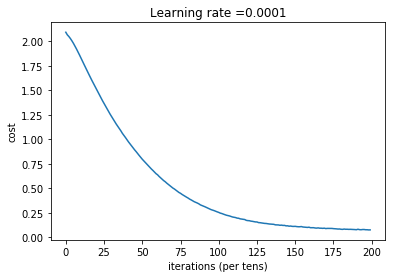

Parameters have been trained!
Train Accuracy: 0.9827381
Test Accuracy: 0.12083333
Cost after epoch 0: 2.091140
Cost after epoch 100: 1.509926
Cost after epoch 200: 0.993913
Cost after epoch 300: 0.636968
Cost after epoch 400: 0.399227
Cost after epoch 500: 0.253127
Cost after epoch 600: 0.168607
Cost after epoch 700: 0.121880
Cost after epoch 800: 0.096968
Cost after epoch 900: 0.081070
Cost after epoch 1000: 0.074663
Cost after epoch 1100: 0.066216
Cost after epoch 1200: 0.060977
Cost after epoch 1300: 0.060641
Cost after epoch 1400: 0.060284


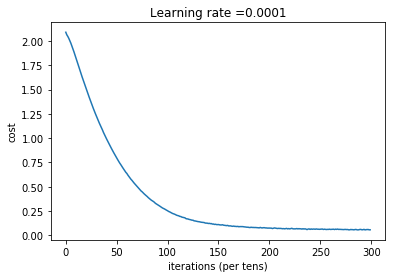

Parameters have been trained!
Train Accuracy: 0.98392856
Test Accuracy: 0.11785714


In [66]:
#Optimizing #epochs
num_epochs=[500,1000,1500]
costs1=[]
costs2=[]
costs3=[]
train_accuracies_epoch=[]
test_accuracies_epoch=[]
for epc in num_epochs:
    params, cost, train_accuracy, test_accuracy = model(X_train, Y_train, X_test, Y_test, .0001, epc, 64)
    if(epc==num_epochs[0]):
        costs1=cost
    elif(epc==num_epochs[1]):
        costs2=cost
    else:
        costs3=cost
    train_accuracies_epoch.append(train_accuracy)
    test_accuracies_epoch.append(test_accuracy)



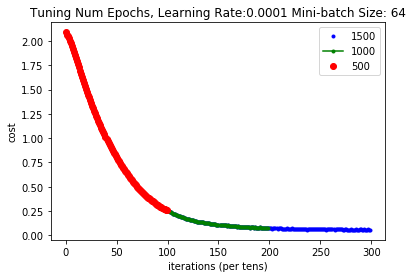

In [84]:
plt.plot(np.squeeze(costs3),'b.')
plt.plot(np.squeeze(costs2),'g.-')
plt.plot(np.squeeze(costs1),'ro')
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Tuning Num Epochs, Learning Rate:0.0001 Mini-batch Size: 64")
# plt.show()
plt.legend(labels = ['1500','1000','500'])

Cost after epoch 0: 2.082543
Cost after epoch 100: 0.551997
Cost after epoch 200: 0.160447
Cost after epoch 300: 0.117904
Cost after epoch 400: 0.096495
Cost after epoch 500: 0.090988
Cost after epoch 600: 0.086885
Cost after epoch 700: 0.072601
Cost after epoch 800: 0.079896
Cost after epoch 900: 0.068699


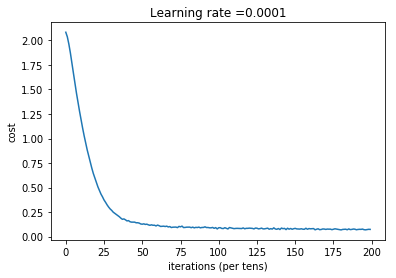

Parameters have been trained!
Train Accuracy: 0.9811012
Test Accuracy: 0.13333334
Cost after epoch 0: 2.085262
Cost after epoch 100: 1.074086
Cost after epoch 200: 0.454385
Cost after epoch 300: 0.201833
Cost after epoch 400: 0.123488
Cost after epoch 500: 0.093571
Cost after epoch 600: 0.084249
Cost after epoch 700: 0.079789
Cost after epoch 800: 0.072495
Cost after epoch 900: 0.066103


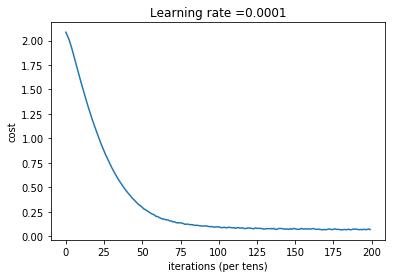

Parameters have been trained!
Train Accuracy: 0.9824405
Test Accuracy: 0.1125
Cost after epoch 0: 2.091140
Cost after epoch 100: 1.509926
Cost after epoch 200: 0.993913
Cost after epoch 300: 0.636968
Cost after epoch 400: 0.399227
Cost after epoch 500: 0.253127
Cost after epoch 600: 0.168607
Cost after epoch 700: 0.121880
Cost after epoch 800: 0.096968
Cost after epoch 900: 0.081070


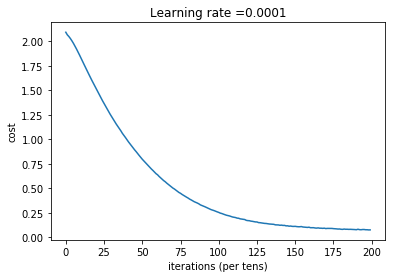

Parameters have been trained!
Train Accuracy: 0.9827381
Test Accuracy: 0.12083333
Cost after epoch 0: 2.136319
Cost after epoch 100: 1.716144
Cost after epoch 200: 1.291333
Cost after epoch 300: 0.959234
Cost after epoch 400: 0.701921
Cost after epoch 500: 0.509044
Cost after epoch 600: 0.365683
Cost after epoch 700: 0.263759
Cost after epoch 800: 0.196590
Cost after epoch 900: 0.150826


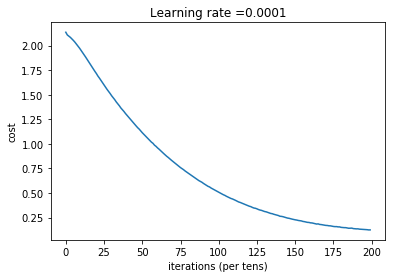

Parameters have been trained!
Train Accuracy: 0.9717262
Test Accuracy: 0.12083333


In [79]:
#optimizing mini match size
mini_batch_sizes=[4, 16, 64, 128]

train_accuracies_batch=[]
test_accuracies_batch=[]
for bat in mini_batch_sizes:
    params, cost, train_accuracy, test_accuracy = model(X_train, Y_train, X_test, Y_test, .0001, 1000, bat)
    if(bat==mini_batch_sizes[0]):
        costs=cost
    else:
        costs=np.vstack((costs,cost))
    train_accuracies_epoch.append(train_accuracy)
    test_accuracies_epoch.append(test_accuracy)


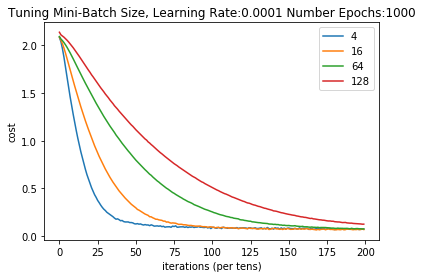

In [83]:
for i in range(4):
    plt.plot(np.squeeze(costs[i,:]))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Tuning Mini-Batch Size, Learning Rate:0.0001 Number Epochs:1000")
# plt.show()
plt.legend(mini_batch_sizes)